# What is the difference in lexical complexity between French and English in the expression of emotions?

## 1. Question

Today we live in a world where more than 7,000 languages ​​coexist, not to mention the thousands of existing dialects. In the era of globalization and where everything is shared and exchanged, translation is essential, so much so that some people make it their job (interpreters, translators). It is known that translation should not be done "word by word" but "expression by expression". An expression that might only require one word in one language, can represent a group of words in another, as already seen in class. What interests me today is the difference in lexical complexity between two languages ​​when it comes to expressing emotions. That's why I'm going to try to understand:

### What is the difference in lexical complexity between French and English in the expression of emotions?

I will carry out this study on French and English, first of all because these are the languages ​​that my dataset lists, and then because I find it interesting to start this study with two common languages. But it would be just as interesting to carry out this analysis on other languages ​​and dialects later.

## 2. Data

### 2.1 Library import

I start by importing the libraries necessary for my analysis.

In [1]:
import pandas as pd
import scipy.stats as stats
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel

## 2.2 Data import

I then import my dataset composed of three columns: the first which says whether yes (1) or no (0) an emotion is present in the comment, the second which lists the comments in French in question (which relate to films) and the third which is the English translation of each of the comments.

In [2]:
df = pd.read_csv("french_to_english_movies.csv", sep=";")

display(df)

,rating,review,translation
0,0,Si vous cherchez du cinéma abrutissant à tous ...,If you are looking for stupid cinema on all fl...
1,0,"Profitant de son passage télé,je l'ai regardé ...","Taking advantage of his TV passage, I looked a..."
2,0,"A mourir d'ennui. le vrai ennui, c'est que j'a...","To die Dennui.The real boredom, it is that I w..."
3,0,Opération arctique ne se regarde que pour ses ...,Arctic operation is only looked for for its la...
4,0,Je déconseille ce film qui est ennuyant et dép...,I do not recommend this movie that is boring a...
...,...,...,...
159995,1,"Aussi kitsch et jubilatoire que ""Supervixen"" e...",Also kitsch and jubilant that Supervixen and M...
159996,1,Un film rempli d'un charme terrible que j'aura...,A film filled with a terrible charm that shoul...
159997,1,"un thriller fantastique erotique, sur le thème...","A fantastic erotic thriller, on the theme of t..."
159998,1,Très bon film réaliste au jeu avec de bon effe...,Very good realistic movie in the game with goo...


To perform our analysis we will divide our table into two sub-tables: one for comments without emotions and one for those with. We will then study the proportion of word differences between the languages ​​in each of the tables and compare the results.

it is important to compare our results from the two sub-tables to focus only on the difference in expressions that concern feelings. It is known that French is a language that generally uses more words than English. We will therefore, using the table without emotions, define our "lambda" difference, then compare it to the difference between messages with feelings.

### 2.3 Data modelling

So I separate my table into two sub-tables. The first for comments without emotion (rating = 0) and the second for those with (rating = 1). I also display the number of rows in each of my subtables to make sure they are roughly equal.

In [3]:
# We separate the data into two sub-tables
df_rating_0 = df[df['rating'] == 0]  # Subtable where rating = 0
df_rating_1 = df[df['rating'] == 1]  # Subtable where rating = 1


# We display the two sub-tables
display(df_rating_0)
display(df_rating_1)

# We size the sub-arrays to verify that both are approximately the same size
print(f"Number of lines where rating = 0 : {len(df_rating_0)}")
print(f"Number of lines where rating = 1 : {len(df_rating_1)}")


,rating,review,translation
0,0,Si vous cherchez du cinéma abrutissant à tous ...,If you are looking for stupid cinema on all fl...
1,0,"Profitant de son passage télé,je l'ai regardé ...","Taking advantage of his TV passage, I looked a..."
2,0,"A mourir d'ennui. le vrai ennui, c'est que j'a...","To die Dennui.The real boredom, it is that I w..."
3,0,Opération arctique ne se regarde que pour ses ...,Arctic operation is only looked for for its la...
4,0,Je déconseille ce film qui est ennuyant et dép...,I do not recommend this movie that is boring a...
...,...,...,...
79408,0,Dangerous People manque un peu de tout : d'ori...,Dangerous People is missing a little bit of al...
79409,0,"Une comédie décalé a l'humour gras et lourd , ...","A staggering comedy with lhum fat and heavy, i..."
79410,0,Le film contient beaucoup de mauvais point la ...,The film contains a lot of bad point the backg...
79411,0,Ce film est encore plus mauvais que ce que je ...,This movie is even worse than I feared by watc...


,rating,review,translation
79413,1,"Un film au casting de choix, un scénario origi...","A movie at the casting cast, an original scena..."
79414,1,"Un documentaire sur Jiro, un personnage peu co...","A documentary on Jiro, an unusual character wh..."
79415,1,"Faire un documentaire, c'était trop simple pou...","Make a documentary, it was too simple for Wim ..."
79416,1,Très beau film sur un musicien finalement peu ...,Very beautiful movie on a musician finally lit...
79417,1,Le chef d'œuvre de Lubitsch qui fait preuve d'...,The chief of Lubitsch who demonstrates a great...
...,...,...,...
159995,1,"Aussi kitsch et jubilatoire que ""Supervixen"" e...",Also kitsch and jubilant that Supervixen and M...
159996,1,Un film rempli d'un charme terrible que j'aura...,A film filled with a terrible charm that shoul...
159997,1,"un thriller fantastique erotique, sur le thème...","A fantastic erotic thriller, on the theme of t..."
159998,1,Très bon film réaliste au jeu avec de bon effe...,Very good realistic movie in the game with goo...


Number of lines where rating = 0 : 79413
Number of lines where rating = 1 : 80587


## 3. Analysis

### 3.1 unemotional comments

We display the tables that interest us for this part.

In [4]:
display(df_rating_0)

,rating,review,translation
0,0,Si vous cherchez du cinéma abrutissant à tous ...,If you are looking for stupid cinema on all fl...
1,0,"Profitant de son passage télé,je l'ai regardé ...","Taking advantage of his TV passage, I looked a..."
2,0,"A mourir d'ennui. le vrai ennui, c'est que j'a...","To die Dennui.The real boredom, it is that I w..."
3,0,Opération arctique ne se regarde que pour ses ...,Arctic operation is only looked for for its la...
4,0,Je déconseille ce film qui est ennuyant et dép...,I do not recommend this movie that is boring a...
...,...,...,...
79408,0,Dangerous People manque un peu de tout : d'ori...,Dangerous People is missing a little bit of al...
79409,0,"Une comédie décalé a l'humour gras et lourd , ...","A staggering comedy with lhum fat and heavy, i..."
79410,0,Le film contient beaucoup de mauvais point la ...,The film contains a lot of bad point the backg...
79411,0,Ce film est encore plus mauvais que ce que je ...,This movie is even worse than I feared by watc...


We display the distribution of English and French comments according to their number of words for visual reference.

/var/folders/f8/7nq4mxy56ljfvspc_ygybf3c0000gn/T/ipykernel_34465/4130552678.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_0['nb_mots_fr'] = df_rating_0['review'].str.split().str.len()
/var/folders/f8/7nq4mxy56ljfvspc_ygybf3c0000gn/T/ipykernel_34465/4130552678.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_0['nb_mots_en'] = df_rating_0['translation'].str.split().str.len()


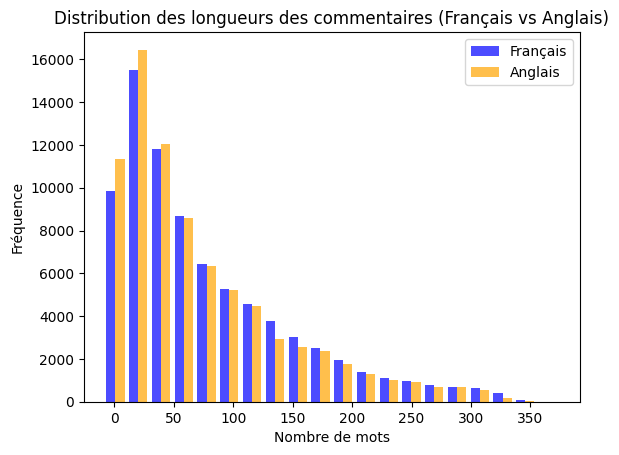

In [5]:
# We calculate the number of words in each comment of each line (French and English)
df_rating_0['nb_mots_fr'] = df_rating_0['review'].str.split().str.len()
df_rating_0['nb_mots_en'] = df_rating_0['translation'].str.split().str.len()


bins = 20  # On crée 20 groupes de colonnes sur l'histogramme pour ne pas le surcharger
bin_edges = np.histogram_bin_edges(df_rating_0[['nb_mots_fr', 'nb_mots_en']], bins=bins)

# We calculate the histograms for the two distributions
hist_fr, _ = np.histogram(df_rating_0['nb_mots_fr'], bins=bin_edges)
hist_en, _ = np.histogram(df_rating_0['nb_mots_en'], bins=bin_edges)

bar_width = (bin_edges[1] - bin_edges[0]) * 0.4  # We define the visual and the proportion of the sizes of our columns
x_fr = bin_edges[:-1] - bar_width / 2  # Position of the French bars
x_en = bin_edges[:-1] + bar_width / 2  # Position of the English bars

# We draw the bars side by side
plt.bar(x_fr, hist_fr, width=bar_width, alpha=0.7, label="Français", color='blue')
plt.bar(x_en, hist_en, width=bar_width, alpha=0.7, label="Anglais", color='orange')

# We add the labels, the title and the legend
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.title("Distribution des longueurs des commentaires (Français vs Anglais)")
plt.legend()

# We display the graph
plt.show()


We then want to calculate the percentage difference in the number of words between the French column and the English column.

In [6]:
df_rating_0 = df_rating_0.copy() # We create a copy of our table so as not to modify the original

# We calculate the percentage difference in the number of words for each line
df_rating_0['pourcentage_augmentation'] = (
    (df_rating_0['nb_mots_fr'] - df_rating_0['nb_mots_en']) / df_rating_0['nb_mots_en']
) * 100

# We calculate the average of all these percentages
mean = df_rating_0['pourcentage_augmentation'].mean()

# We calculate the standard error of the mean which measures the probable variation of the mean if we repeat the sampling
std_err = stats.sem(df_rating_0['pourcentage_augmentation']) 

# We calculate the interval where the true mean normally lies with a confidence level of 95%
conf_int = stats.t.interval(
    confidence=0.95,  # We set the confidence level to 95%
    df=len(df_rating_0['pourcentage_augmentation']) - 1,  # We define the degree of freedom of our interval
    loc=mean,  # We use the calculated mean as the center of our interval
    scale=std_err  # We use the calculated standard error to define the width of our interval
)

# We display the results
print(f"Average percentage increase : {mean:.2f}%")
print(f"95% confidence interval: [{conf_int[0]:.2f}%, {conf_int[1]:.2f}%]")

Average percentage increase : 8.59%
95% confidence interval: [8.43%, 8.75%]


So we have the result that French comments without emotions are 8.59% longer. But we now need to check whether this result is significant or not.

We then carry out a significance test which, thanks to the test statistic and the p-value, will tell us whether our result is significant or not.

In [7]:
# We perform a paired t-test, that is to say that we consider our input variables (here columns 2 and 3 of our table) as being linked
t_stat, p_value = ttest_rel(df_rating_0['nb_mots_fr'], df_rating_0['nb_mots_en'])

print(f"Statistique de test : {t_stat:.2f}") # Calculates and returns the value of the two-variable statistic
print(f"p-value : {p_value:.5f}")# We calculate and return the value of our p-value

# We return an interpretation based on the value of our p-value
if p_value < 0.05:
    print("The difference in length is significant (p < 0.05).")
else:
    print("The difference in length is not significant (p >= 0.05).")


Statistique de test : 244.53
p-value : 0.00000
The difference in length is significant (p < 0.05).


So we can conclude this subsection by saying that on average, a comment without emotions in French will be longer by 8.59% of words (with an error interval of 0.16%). This will be our reference difference. We will now compare it to the difference between comments with emotions.

### 3.2 Comments with emotions

We display the tables that interest us for this part.

In [8]:
display(df_rating_1)

,rating,review,translation
79413,1,"Un film au casting de choix, un scénario origi...","A movie at the casting cast, an original scena..."
79414,1,"Un documentaire sur Jiro, un personnage peu co...","A documentary on Jiro, an unusual character wh..."
79415,1,"Faire un documentaire, c'était trop simple pou...","Make a documentary, it was too simple for Wim ..."
79416,1,Très beau film sur un musicien finalement peu ...,Very beautiful movie on a musician finally lit...
79417,1,Le chef d'œuvre de Lubitsch qui fait preuve d'...,The chief of Lubitsch who demonstrates a great...
...,...,...,...
159995,1,"Aussi kitsch et jubilatoire que ""Supervixen"" e...",Also kitsch and jubilant that Supervixen and M...
159996,1,Un film rempli d'un charme terrible que j'aura...,A film filled with a terrible charm that shoul...
159997,1,"un thriller fantastique erotique, sur le thème...","A fantastic erotic thriller, on the theme of t..."
159998,1,Très bon film réaliste au jeu avec de bon effe...,Very good realistic movie in the game with goo...


We display the distribution of English and French comments according to their number of words for visual reference.

/var/folders/f8/7nq4mxy56ljfvspc_ygybf3c0000gn/T/ipykernel_34465/3415826554.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_1['nb_mots_fr'] = df_rating_1['review'].str.split().str.len()
/var/folders/f8/7nq4mxy56ljfvspc_ygybf3c0000gn/T/ipykernel_34465/3415826554.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_rating_1['nb_mots_en'] = df_rating_1['translation'].str.split().str.len()


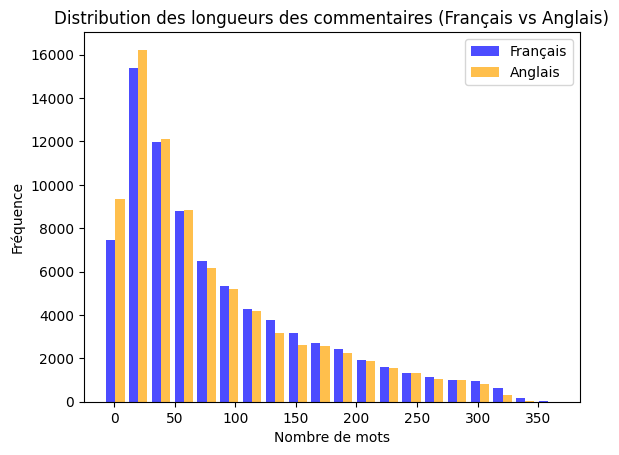

In [9]:
# We calculate the number of words in each comment of each line (French and English)
df_rating_1['nb_mots_fr'] = df_rating_1['review'].str.split().str.len()
df_rating_1['nb_mots_en'] = df_rating_1['translation'].str.split().str.len()


bins = 20  # On crée 20 groupes de colonnes sur l'histogramme pour ne pas le surcharger
bin_edges = np.histogram_bin_edges(df_rating_1[['nb_mots_fr', 'nb_mots_en']], bins=bins)

# We calculate the histograms for the two distributions
hist_fr, _ = np.histogram(df_rating_1['nb_mots_fr'], bins=bin_edges)
hist_en, _ = np.histogram(df_rating_1['nb_mots_en'], bins=bin_edges)

bar_width = (bin_edges[1] - bin_edges[0]) * 0.4  # We define the visual and the proportion of the sizes of our columns
x_fr = bin_edges[:-1] - bar_width / 2  # Position of the French bars
x_en = bin_edges[:-1] + bar_width / 2  # Position of the English bars

# We draw the bars side by side
plt.bar(x_fr, hist_fr, width=bar_width, alpha=0.7, label="Français", color='blue')
plt.bar(x_en, hist_en, width=bar_width, alpha=0.7, label="Anglais", color='orange')

# We add the labels, the title and the legend
plt.xlabel("Nombre de mots")
plt.ylabel("Fréquence")
plt.title("Distribution des longueurs des commentaires (Français vs Anglais)")
plt.legend()

# We display the graph
plt.show()

We then want to calculate the percentage difference in the number of words between the French column and the English column.

In [10]:
df_rating_1 = df_rating_1.copy() # We create a copy of our table so as not to modify the original

# We calculate the percentage difference in the number of words for each line
df_rating_1['pourcentage_augmentation'] = (
    (df_rating_1['nb_mots_fr'] - df_rating_1['nb_mots_en']) / df_rating_1['nb_mots_en']
) * 100

# We calculate the average of all these percentages
mean = df_rating_1['pourcentage_augmentation'].mean()

# We calculate the standard error of the mean which measures the probable variation of the mean if we repeat the sampling
std_err = stats.sem(df_rating_1['pourcentage_augmentation']) 

# We calculate the interval where the true mean normally lies with a confidence level of 95%
conf_int = stats.t.interval(
    confidence=0.95,  # We set the confidence level to 95%
    df=len(df_rating_1['pourcentage_augmentation']) - 1,  # We define the degree of freedom of our interval
    loc=mean,  # We use the calculated mean as the center of our interval
    scale=std_err  # We use the calculated standard error to define the width of our interval
)

# We display the results
print(f"Average percentage increase : {mean:.2f}%")
print(f"95% confidence interval: [{conf_int[0]:.2f}%, {conf_int[1]:.2f}%]")

Average percentage increase : 9.32%
95% confidence interval: [9.24%, 9.40%]


We have as a result that French comments with emotion are longer than English ones by 9.32%. We must now check if this result is relevant.

We then carry out a significance test which, thanks to the test statistic and the p-value, will tell us whether our result is significant or not.

In [11]:
# We perform a paired t-test, that is to say that we consider our input variables (here columns 2 and 3 of our table) as being linked
t_stat, p_value = ttest_rel(df_rating_1['nb_mots_fr'], df_rating_1['nb_mots_en'])

print(f"Statistique de test : {t_stat:.2f}") # Calculates and returns the value of the two-variable statistic
print(f"p-value : {p_value:.5f}")# We calculate and return the value of our p-value

# We return an interpretation based on the value of our p-value
if p_value < 0.05:
    print("The difference in length is significant (p < 0.05).")
else:
    print("The difference in length is not significant (p >= 0.05).")


Statistique de test : 262.68
p-value : 0.00000
The difference in length is significant (p < 0.05).


We can conclude this subsection by saying that French comments with emotions are longer than English ones by 9.32% (with an error interval of 0.08%).

## 4. Conclusion

So we have a "lambda" difference in the number of words between French and English equal to 8.59%. But when we study comments with emotions, this percentage increases to 9.32%. We therefore conclude by saying that expressions relating to emotions in French are indeed longer than English expressions.

However, we do not know the reason for this difference. Is it the French lexical field that is more developed on this subject than English, or the English language that has a more precise vocabulary than French, or perhaps translation plays an important role in this percentage. It would then be interesting to carry out the same study but on English comments translated into French.